In [2]:
# Import the TensorFlow and output the verion

!pip install tensorflow==1.14.0
import tensorflow as tf
print("\n\nTensorFlow version:", tf.__version__)

     |████████████████████████████████| 109.2MB 67kB/s 
     |████████████████████████████████| 491kB 36.8MB/s 
     |████████████████████████████████| 3.2MB 40.9MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 



TensorFlow version: 1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

# Basic RNNs in TensorFlow
- First let's create a very simple RNN model, without using any of TensorFlow's RNN operations.
- We will create an RNN composed of a layer of five recurrent neurons using the tanh activation function. We will assume that the RNN runs over only two timesteps, taking input vectors of size 3 at each time step.<br>
- The following code builds this RNN, unrolled through two time steps:

In [0]:
n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, shape=(None, n_inputs))
X1 = tf.placeholder(tf.float32, shape=(None, n_inputs))

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [3]:
# To run the model, we need to feed it the inputs at both time steps like:
import numpy as np

# Mini-batch
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])  # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])  # t = 1

with tf.Session() as sess:
  init.run()
  Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

NameError: ignored

In [4]:
print(Y0_val)  # output at t = 0

[[-0.6921083  -0.99035764 -0.8729291   0.989037   -0.99768823]
 [-0.9998114  -1.          0.9709639   1.         -0.9997951 ]
 [-0.9999999  -1.          0.9999706   1.         -0.99998176]
 [-0.88205534 -1.          1.          0.9999362   1.        ]]


In [5]:
print(Y1_val)  # output at t = 1

[[-1.         -1.          1.          1.          0.9545274 ]
 [ 0.9879906  -0.42289123  0.8672532  -0.5534051   0.9947409 ]
 [-0.99944764 -1.          1.          1.          0.99923396]
 [ 0.7435236  -0.9999993   0.99996257  0.9998185   0.9999942 ]]


In [6]:
X0_batch.shape

(4, 3)

**Static Unrolling through Time**
- BasicRNNCell() function creates copies of the cell to build the unrolled RNN (one for each time step)
- static_rnn() function calls the BasicRNNCell()'s __call__() function once per input (in below code twice), with shared weights and bias terms and chain them up. It returns two objects: a Python list containing the output tensors for each time step and a tensor containing the final states of network<hr> 
- The following code builds the RNN. It take a single input placeholders of shape [None, n_steps, n_inputs] where the first dimension is the mini-batch size. Then it extracts the list of sequences for each time step. X_seqs is a Python list of n_steps tensors of shape [None, n_inputs], where once again the first dimension is the mini-batch size.
- X_seqs is a Python list of n_steps tensors of shape [None, n_inputs]. 
- Next two lines are self-explanatory (above functions). 
- Finally, we merge the output tensors into a single tensor.

In [19]:
tf.reset_default_graph()

n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

init = tf.global_variables_initializer()

In [0]:
# Now we can run the network by feeding it a single tensor that contains all the mini-batch sequences:
np.random.seed(42)
X_batch = np.random.randint(10, size=[4, n_steps, n_inputs])

with tf.Session() as sess:
  init.run()
  outputs_val = outputs.eval(feed_dict={X: X_batch})

In [21]:
# We get a single outputs_val for all instances, all time steps, and all neurons
print(outputs_val)

[[[ 0.8874359  -0.99999756 -0.9821547   0.9968731  -0.9595433 ]
  [ 0.98201156 -0.99985063 -0.93712014  0.9845191  -0.6102992 ]]

 [[ 0.9858897  -0.999167   -0.59296733  0.92676336 -0.9490221 ]
  [ 0.905005   -0.9995281  -0.9784704   0.9734859   0.41192576]]

 [[ 0.2733176  -0.99999684 -0.95213515  0.9988251  -0.9905364 ]
  [ 0.9566814  -0.9997986  -0.9979897   0.9261524   0.88399297]]

 [[ 0.3683513  -0.999906   -0.9432475   0.9879544  -0.8959845 ]
  [ 0.9626569  -0.32963815  0.95116824  0.76147825 -0.9875381 ]]]


**Dynamic Unrolling Through Time**<br>
The dynamic_rnn() function uses a while_loop() operation to run over the cell the appropriate number of times; also accepts a single tensor for all inputs at every time step and it outputs a single tensor for all outputs.

In [22]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

In [23]:
np.random.seed(42)
X_batch = np.random.randint(10, size=[4, n_steps, n_inputs])

with tf.Session() as sess:
  init.run()
  outputs_val = outputs.eval(feed_dict={X: X_batch})

print(outputs_val)

[[[-0.9089079  -0.75575864 -0.85789424 -0.99999493  0.9981769 ]
  [ 0.44900855 -0.9927434  -0.8450383  -0.9999968   0.9976879 ]]

 [[ 0.28352934 -0.97497714 -0.7123808  -0.9996833   0.9878399 ]
  [-0.5168969  -0.9571659  -0.64193916 -0.99996173  0.9657969 ]]

 [[-0.9694432  -0.6636183  -0.4756942  -0.9999872   0.9938611 ]
  [-0.3996148  -0.3461291  -0.96205145 -0.99998695  0.9953548 ]]

 [[-0.90940696 -0.30549824 -0.62014306 -0.99974257  0.9805392 ]
  [ 0.9595334  -0.999578    0.7237003  -0.9913349   0.6652996 ]]]


# Handling Variable Length Input Sequences
When handling the variable lenght inputs, you need to set the sequence_length argument of dynamic_rnn() function to a 1D tensor indicating the lenght of the input sequence for each instance

In [25]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])
seq_length = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Second input sequence contains only one input instead of two. It must be padded with a zero vector in order to fit in the input tensor X
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 0
        [[3, 4, 5], [0, 0, 0]], # instance 1 (padded with a zero vector)
        [[6, 7, 8], [6, 5, 4]], # instance 2
        [[9, 0, 1], [3, 2, 1]], # instance 3           
])
seq_length_batch = np.array([2, 1, 2, 2])

In [0]:
with tf.Session() as sess:
  init.run()
  outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [29]:
print(outputs_val)

[[[ 8.6597389e-01 -3.7302789e-01  4.0093827e-01  9.2753386e-01
    8.8923764e-01]
  [ 9.9962437e-01  9.9995887e-01  9.8866630e-01  9.6218842e-01
    9.9999136e-01]]

 [[ 9.9799424e-01  7.9514486e-01  7.5641072e-01  9.9339384e-01
    9.9914670e-01]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
    0.0000000e+00]]

 [[ 9.9997199e-01  9.8817724e-01  9.1391367e-01  9.9941587e-01
    9.9999380e-01]
  [ 9.9126506e-01  9.9966586e-01  9.8500568e-01  5.4584771e-01
    9.9723399e-01]]

 [[-5.0562609e-04  9.9995887e-01  9.9378693e-01 -9.9987239e-01
   -7.5242847e-01]
  [ 6.8067551e-01  9.4344717e-01 -5.7538105e-03 -7.6379550e-01
    7.8677428e-01]]]


In [30]:
# Contains the final state of each cell (excluding the zero vectors)
print(states_val)

[[ 0.9996244   0.9999589   0.9886663   0.9621884   0.99999136]
 [ 0.99799424  0.79514486  0.7564107   0.99339384  0.9991467 ]
 [ 0.99126506  0.99966586  0.9850057   0.5458477   0.997234  ]
 [ 0.6806755   0.9434472  -0.00575381 -0.7637955   0.7867743 ]]


# Training RNNs
Let's train an RNN to classify MNIST images. We will treate each image as a sequence of 28 rows of 28 pixels each. Here we will ues 150 recurrent neurons, plus a fully connected layer containing 10 neurons (one per class) connected to the output of the last tiem step, followed by a softmax layer.

In [42]:
tf.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150 
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, shape=[None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [43]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [44]:
n_epochs = 100
batch_size = 128

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      X_batch = X_batch.reshape((-1, n_steps, n_inputs))
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.9453125 Test accuracy: 0.9314
1 Train accuracy: 0.9765625 Test accuracy: 0.9419
2 Train accuracy: 0.9453125 Test accuracy: 0.9523
3 Train accuracy: 0.9453125 Test accuracy: 0.9542
4 Train accuracy: 0.9453125 Test accuracy: 0.962
5 Train accuracy: 0.9609375 Test accuracy: 0.9619
6 Train accuracy: 0.984375 Test accuracy: 0.968
7 Train accuracy: 0.984375 Test accuracy: 0.9684
8 Train accuracy: 0.96875 Test accuracy: 0.9708
9 Train accuracy: 0.984375 Test accuracy: 0.9731
10 Train accuracy: 1.0 Test accuracy: 0.97
11 Train accuracy: 0.984375 Test accuracy: 0.9664
12 Train accuracy: 0.9921875 Test accuracy: 0.975
13 Train accuracy: 1.0 Test accuracy: 0.9724
14 Train accuracy: 1.0 Test accuracy: 0.9756
15 Train accuracy: 0.9921875 Test accuracy: 0.9743
16 Train accuracy: 0.984375 Test accuracy: 0.9697
17 Train accuracy: 0.984375 Test accuracy: 0.9764
18 Train accuracy: 0.9921875 Test accuracy: 0.9764
19 Train accuracy: 0.9921875 Test accuracy: 0.974
20 Train accuracy: 1.0

# Training to Predict Time Series
- Let's train an RNN to predict the next value in a generated time series. Each training instance is a randomly selected sequence of 20 consecutive values from the time series, and the target sequence is the same as the inptu sequence.
- RNN will contain 100 recurrent neurons and we will unroll it over 20 time steps since each training instance will be 20 inputs long. Each input will contain only one feature. The targets are also sequences of 20 inputs, each containing a single value.
- OutputProjectionVector adds a fully connected layer of linear neurons without any activation funciton on top of each output.

In [0]:
# Generating a time series data
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

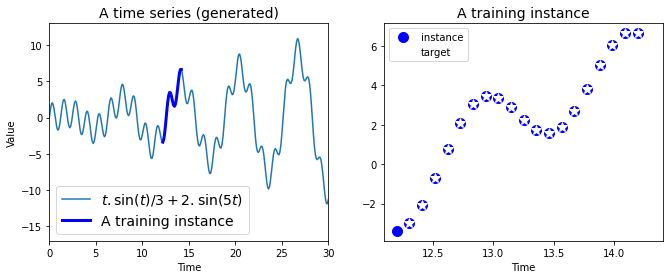

In [63]:
import matplotlib.pyplot as plt

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()


In [64]:
tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu), output_size=n_outputs
)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [0]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [66]:
n_iterations = 1500
batch_size = 64

with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    X_batch, y_batch = next_batch(batch_size, n_steps)
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    if iteration % 100 == 0:
      mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
      print(iteration, "\tMSE:", mse)

  saver.save(sess, "./my_time_series_model")

0 	MSE: 16.961723
100 	MSE: 0.6992024
200 	MSE: 0.25236994
300 	MSE: 0.152736
400 	MSE: 0.07181558
500 	MSE: 0.0545518
600 	MSE: 0.053348094
700 	MSE: 0.04899608
800 	MSE: 0.052934397
900 	MSE: 0.046733588
1000 	MSE: 0.043861765
1100 	MSE: 0.049820088
1200 	MSE: 0.049274843
1300 	MSE: 0.042704657
1400 	MSE: 0.038499806


In [67]:
# Once the model is trained, you can make predictions:
with tf.Session() as sess:                          
    saver.restore(sess, "./my_time_series_model")   

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

y_pred

INFO:tensorflow:Restoring parameters from ./my_time_series_model


array([[[-3.4458642 ],
        [-2.4483187 ],
        [-1.1174662 ],
        [ 0.73597336],
        [ 2.1876886 ],
        [ 3.1163116 ],
        [ 3.4410834 ],
        [ 3.370283  ],
        [ 2.8309336 ],
        [ 2.2178926 ],
        [ 1.7434926 ],
        [ 1.5583736 ],
        [ 1.9011683 ],
        [ 2.7388444 ],
        [ 3.9232147 ],
        [ 5.1215677 ],
        [ 6.144833  ],
        [ 6.6821065 ],
        [ 6.6337996 ],
        [ 5.9318953 ]]], dtype=float32)

Instead of using OutputProjectionWrapper which is inefficient and slows down the training we will use a a bit trickier but more efficient solution described below: <br>
Reshape the RNN outputs from [batch_size, n_steps, n_neurons] to [batch_size * n_steps, n_neurons], then apply a fully connected layer with appropriate size (in this case 1), which will result in an output tensor of shape [batch_size * n_steps, n_outputs], and then reshape this tensor to [batch_size, n_steps, n_outputs]. 

In [70]:
tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [73]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [0]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [75]:
n_iterations = 1500
batch_size = 64

with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    X_batch, y_batch = next_batch(batch_size, n_steps)
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    if iteration % 100 == 0:
      mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
      print(iteration, "\tMSE:", mse)

  saver.save(sess, "./my_time_series_model")

0 	MSE: 20.43783
100 	MSE: 0.62868893
200 	MSE: 0.18511285
300 	MSE: 0.112789914
400 	MSE: 0.061879586
500 	MSE: 0.06658075
600 	MSE: 0.0517594
700 	MSE: 0.0565153
800 	MSE: 0.058119655
900 	MSE: 0.042504456
1000 	MSE: 0.06319202
1100 	MSE: 0.04533728
1200 	MSE: 0.057544004
1300 	MSE: 0.044885643
1400 	MSE: 0.044187326


In [76]:
# Once the model is trained, you can make predictions:
with tf.Session() as sess:                          
    saver.restore(sess, "./my_time_series_model")   

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

y_pred

INFO:tensorflow:Restoring parameters from ./my_time_series_model


array([[[-3.4006875],
        [-2.509924 ],
        [-1.1873482],
        [ 0.6874228],
        [ 2.0651352],
        [ 3.0677056],
        [ 3.4296603],
        [ 3.3434434],
        [ 2.8280578],
        [ 2.1883986],
        [ 1.6366467],
        [ 1.5050808],
        [ 1.8886119],
        [ 2.6965287],
        [ 3.8400476],
        [ 5.0756674],
        [ 6.065374 ],
        [ 6.627118 ],
        [ 6.6056657],
        [ 5.995962 ]]], dtype=float32)

# Creative RNN

INFO:tensorflow:Restoring parameters from ./my_time_series_model


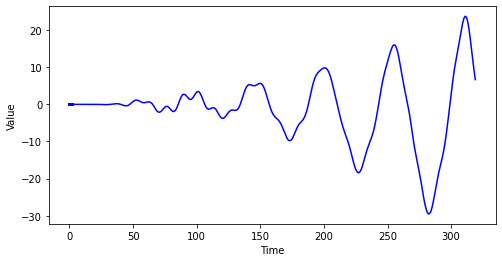

In [78]:
with tf.Session() as sess:                        
    saver.restore(sess, "./my_time_series_model") 

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Deep RNNs

In [79]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [80]:
X_batch = np.random.rand(2, n_steps, n_inputs)

with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

outputs_val.shape

(2, 5, 100)

# Applying Dropuout
The following code apploes dropout to the inputs of each layer in the RNN, dropping each input with a 50% probability:

In [100]:
tf.reset_default_graph()

keep_prob = 0.5
n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

In [82]:
X_batch = np.random.rand(2, n_steps, n_inputs)

with tf.Session() as sess:
  init.run()
  outputs_val, states_val = sess.run([rnn_outputs, states], feed_dict={X: X_batch})

outputs_val.shape

(2, 5, 100)

# LSTM Cell
- lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
- lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)
- gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

In [11]:
tf.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.LSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [13]:
n_epochs = 10
batch_size = 128

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
      X_batch = X_batch.reshape((-1, n_steps, n_inputs))
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: X_test.reshape((-1, n_steps, n_inputs)), y: y_test})
    print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy: 0.9609375 Test accuracy: 0.9527
1 Last batch accuracy: 0.984375 Test accuracy: 0.9732
2 Last batch accuracy: 0.9921875 Test accuracy: 0.9777
3 Last batch accuracy: 0.9921875 Test accuracy: 0.9819
4 Last batch accuracy: 1.0 Test accuracy: 0.9794
5 Last batch accuracy: 0.9921875 Test accuracy: 0.9856
6 Last batch accuracy: 0.9921875 Test accuracy: 0.9861
7 Last batch accuracy: 0.9921875 Test accuracy: 0.9845
8 Last batch accuracy: 0.9921875 Test accuracy: 0.9883
9 Last batch accuracy: 0.9921875 Test accuracy: 0.9869


# Embeddings

## Fetch the Data

In [0]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [0]:
words = fetch_words_data()

In [16]:
words[:10]

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against']

## Build the Dictionary

In [0]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [('UNK', None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [35]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))